In [ ]:
//@version=5
indicator("HR Logic", overlay=true)

// === UTILITY FUNCTION ===
f_show(tf) => timeframe.period != tf

// === HOURLY ===
hH = request.security(syminfo.tickerid, "60", high, lookahead=barmerge.lookahead_on)
hL = request.security(syminfo.tickerid, "60", low, lookahead=barmerge.lookahead_on)
hIdx = request.security(syminfo.tickerid, "60", bar_index, lookahead=barmerge.lookahead_on)

var int hPrev = na
var float hHi = na
var int hHiBar = na
var line hHiLine = na
var bool hHiOn = false
var float hLo = na
var int hLoBar = na
var line hLoLine = na
var bool hLoOn = false

if hIdx != hPrev
    hPrev := hIdx
    hHi := na
    hHiBar := na
    line.delete(hHiLine)
    hHiLine := na
    hHiOn := false
    hLo := na
    hLoBar := na
    line.delete(hLoLine)
    hLoLine := na
    hLoOn := false

if high == hH
    hHi := high
    hHiBar := bar_index
    hHiLine := line.new(bar_index, hHi, bar_index + 1, hHi, color=color.red, width=2)
    hHiOn := true

if low == hL
    hLo := low
    hLoBar := bar_index
    hLoLine := line.new(bar_index, hLo, bar_index + 1, hLo, color=color.red, width=2)
    hLoOn := true

if hHiOn and not na(hHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hHi <= bMax and hHi >= bMin
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)
        hHiOn := false
    else
        line.set_x2(hHiLine, bar_index)
        line.set_y2(hHiLine, hHi)

if hLoOn and not na(hLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if hLo <= bMax and hLo >= bMin
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)
        hLoOn := false
    else
        line.set_x2(hLoLine, bar_index)
        line.set_y2(hLoLine, hLo)

// === 30M ===
tH = request.security(syminfo.tickerid, "30", high, lookahead=barmerge.lookahead_on)
tL = request.security(syminfo.tickerid, "30", low, lookahead=barmerge.lookahead_on)
tO = request.security(syminfo.tickerid, "30", open, lookahead=barmerge.lookahead_on)
tC = request.security(syminfo.tickerid, "30", close, lookahead=barmerge.lookahead_on)
tIdx = request.security(syminfo.tickerid, "30", bar_index, lookahead=barmerge.lookahead_on)

plot(tO, title="30M Open", color=color.rgb(0, 20, 133, 60), style=plot.style_stepline_diamond, linewidth=1)

isBull = tC > tO
isBear = tC < tO

phb = plot(isBull ? tH : na, color=color.new(#4caf4f, 100), style=plot.style_steplinebr)
plb = plot(isBull ? tL : na, color=color.new(#4caf4f, 100), style=plot.style_steplinebr)
phr = plot(isBear ? tH : na, color=color.new(#ff5252, 100), style=plot.style_steplinebr)
plr = plot(isBear ? tL : na, color=color.new(#ff5252, 100), style=plot.style_steplinebr)

fill(phb, plb, color=color.new(color.blue, 95))
fill(phr, plr, color=color.new(color.red, 95))

var int tPrev = na
var float tHi = na
var int tHiBar = na
var line tHiLine = na
var bool tHiOn = false
var float tLo = na
var int tLoBar = na
var line tLoLine = na
var bool tLoOn = false

if tIdx != tPrev
    tPrev := tIdx
    tHi := na
    tHiBar := na
    line.delete(tHiLine)
    tHiLine := na
    tHiOn := false
    tLo := na
    tLoBar := na
    line.delete(tLoLine)
    tLoLine := na
    tLoOn := false

if tHiOn and not na(tHiLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if tHi <= bMax and tHi >= bMin
        line.set_x2(tHiLine, bar_index)
        line.set_y2(tHiLine, tHi)
        tHiOn := false
    else
        line.set_x2(tHiLine, bar_index)
        line.set_y2(tHiLine, tHi)

if tLoOn and not na(tLoLine)
    bMin = math.min(open, close)
    bMax = math.max(open, close)
    if tLo <= bMax and tLo >= bMin
        line.set_x2(tLoLine, bar_index)
        line.set_y2(tLoLine, tLo)
        tLoOn := false
    else
        line.set_x2(tLoLine, bar_index)
        line.set_y2(tLoLine, tLo)

// === D/W/M High-Low Steplines ===
dH = request.security(syminfo.tickerid, "D", high, lookahead=barmerge.lookahead_on)
dL = request.security(syminfo.tickerid, "D", low,  lookahead=barmerge.lookahead_on)
wH = request.security(syminfo.tickerid, "W", high, lookahead=barmerge.lookahead_on)
wL = request.security(syminfo.tickerid, "W", low,  lookahead=barmerge.lookahead_on)
mH = request.security(syminfo.tickerid, "M", high, lookahead=barmerge.lookahead_on)
mL = request.security(syminfo.tickerid, "M", low,  lookahead=barmerge.lookahead_on)

plot(f_show("60") ? hH : na, title="H High", color=color.new(color.black, 90), style=plot.style_stepline, linewidth = 2)
plot(f_show("60") ? hL : na, title="H Low",  color=color.new(color.black, 90), style=plot.style_stepline, linewidth = 2)
plot(f_show("D")  ? dH : na, title="D High", color=color.new(color.green, 50), style=plot.style_stepline)
plot(f_show("D")  ? dL : na, title="D Low",  color=color.new(color.green, 70), style=plot.style_stepline)
plot(f_show("W")  ? wH : na, title="W High", color=color.new(color.blue, 50), style=plot.style_stepline)
plot(f_show("W")  ? wL : na, title="W Low",  color=color.new(color.blue, 70), style=plot.style_stepline)
plot(f_show("M")  ? mH : na, title="M High", color=color.new(color.purple, 40), style=plot.style_stepline)
plot(f_show("M")  ? mL : na, title="M Low",  color=color.new(color.purple, 60), style=plot.style_stepline)

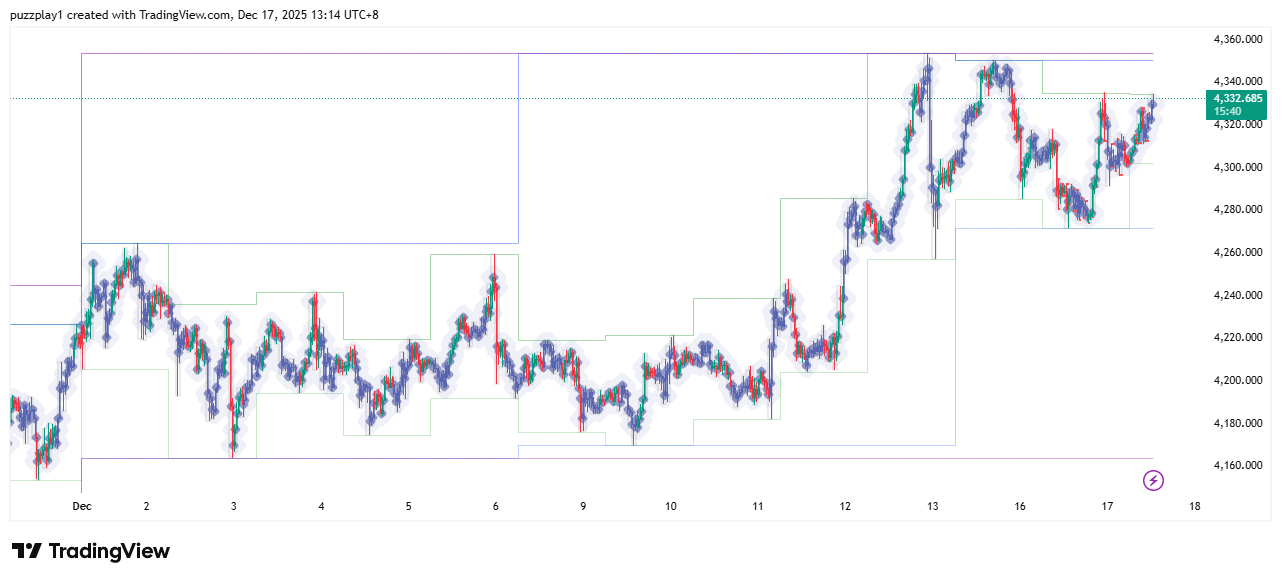